In [1]:
from pymongo import MongoClient, ASCENDING, DESCENDING
%matplotlib inline
from ggplot import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import csv
from pandas import DataFrame
import pandas as pd
import numpy as np
import collections
from bson import Code

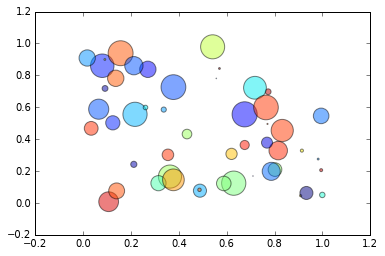

In [2]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()


In [3]:
client = MongoClient()
anycast = client.anycast_monitoring

In [6]:
reducer = Code("""
    function(obj, prev) {
        if(obj.path4.length > obj.path6.length) {
            prev.ipv6_shorter++;
        }
        else if(obj.path4.length < obj.path6.length) {
            prev.ipv4_shorter++;
        }
        else if(obj.path4.length == obj.path6.length) {
            if(obj.path4.toString() == obj.path6.toString()) {
                prev.identical++;
            } else {
                prev.different_path++;
            }
        }
    }
""")


root = 'a'
coll = anycast['{}_root'.format(root)]
res = coll.group(key={'timestamp':1}, 
                 condition={}, 
                 initial={'identical': 0, 'different_path': 0, 'ipv4_shorter': 0, 'ipv6_shorter': 0}, 
                 reduce=reducer)

df = DataFrame(res)
df['timestamp'] = pd.to_datetime(df['timestamp'] * 1000000000)
df = df.set_index(['timestamp'])

df

,different_path,identical,ipv4_shorter,ipv6_shorter
timestamp,,,,
2008-05-01,0.0,0.0,0.0,2.0
2008-07-01,0.0,0.0,0.0,3.0
2009-03-01,1.0,0.0,0.0,3.0
2009-07-01,1.0,0.0,0.0,24.0
2009-08-01,10.0,0.0,0.0,15.0
2009-09-01,4.0,0.0,0.0,22.0
2009-10-01,2.0,0.0,1.0,22.0
2009-11-01,7.0,0.0,0.0,18.0
2009-12-01,3.0,0.0,0.0,24.0


In [7]:
df.sort_index(inplace=True)
df

,different_path,identical,ipv4_shorter,ipv6_shorter
timestamp,,,,
2008-03-01,0.0,0.0,0.0,23.0
2008-05-01,0.0,0.0,0.0,2.0
2008-07-01,0.0,0.0,0.0,3.0
2009-03-01,1.0,0.0,0.0,3.0
2009-07-01,1.0,0.0,0.0,24.0
2009-08-01,10.0,0.0,0.0,15.0
2009-09-01,4.0,0.0,0.0,22.0
2009-10-01,2.0,0.0,1.0,22.0
2009-11-01,7.0,0.0,0.0,18.0


In [8]:
df.index[-1]

Timestamp('2016-06-01 00:00:00')

In [9]:
datetime(2016, 6, 1, 0, 0, 0) == df.index[-1]

True

In [10]:
start = datetime(2008, 3, 1, 0, 0, 0)
stop = datetime(2016, 6, 1, 0, 0, 0)

cur_date = start
missing_date = list()
while cur_date <= stop:
    if cur_date not in df.index:
        print('not in index: {}'.format(cur_date))
        missing_date.append(cur_date)
    
    # increase date
    year = cur_date.year + 1 if cur_date.month == 12 else cur_date.year
    month = 1 if cur_date.month == 12 else cur_date.month + 1
    cur_date = datetime(year, month, 1, 0, 0, 0)

print('append rows...')
missing_rows = DataFrame(index=missing_date, columns=df.columns)
df = df.append(missing_rows)

df.sort_index(inplace=True)

df


not in index: 2008-04-01 00:00:00
not in index: 2008-06-01 00:00:00
not in index: 2008-08-01 00:00:00
not in index: 2008-09-01 00:00:00
not in index: 2008-10-01 00:00:00
not in index: 2008-11-01 00:00:00
not in index: 2008-12-01 00:00:00
not in index: 2009-01-01 00:00:00
not in index: 2009-02-01 00:00:00
not in index: 2009-04-01 00:00:00
not in index: 2009-05-01 00:00:00
not in index: 2009-06-01 00:00:00
append rows...


,different_path,identical,ipv4_shorter,ipv6_shorter
2008-03-01,0.0,0.0,0.0,23.0
2008-04-01,NaN,NaN,NaN,NaN
2008-05-01,0.0,0.0,0.0,2.0
2008-06-01,NaN,NaN,NaN,NaN
2008-07-01,0.0,0.0,0.0,3.0
2008-08-01,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN
2008-12-01,NaN,NaN,NaN,NaN


In [15]:
a = df['identical'].mean(skipna=True) 
a

12.852272727272727

In [20]:
for item in df.iterrows():
    total = item[1].sum()
    print('{} {}'.format(item[0], total))

2008-03-01 00:00:00 23.0
2008-04-01 00:00:00 nan
2008-05-01 00:00:00 2.0
2008-06-01 00:00:00 nan
2008-07-01 00:00:00 3.0
2008-08-01 00:00:00 nan
2008-09-01 00:00:00 nan
2008-10-01 00:00:00 nan
2008-11-01 00:00:00 nan
2008-12-01 00:00:00 nan
2009-01-01 00:00:00 nan
2009-02-01 00:00:00 nan
2009-03-01 00:00:00 4.0
2009-04-01 00:00:00 nan
2009-05-01 00:00:00 nan
2009-06-01 00:00:00 nan
2009-07-01 00:00:00 25.0
2009-08-01 00:00:00 25.0
2009-09-01 00:00:00 26.0
2009-10-01 00:00:00 25.0
2009-11-01 00:00:00 25.0
2009-12-01 00:00:00 27.0
2010-01-01 00:00:00 15.0
2010-02-01 00:00:00 25.0
2010-03-01 00:00:00 27.0
2010-04-01 00:00:00 26.0
2010-05-01 00:00:00 28.0
2010-06-01 00:00:00 30.0
2010-07-01 00:00:00 31.0
2010-08-01 00:00:00 29.0
2010-09-01 00:00:00 30.0
2010-10-01 00:00:00 27.0
2010-11-01 00:00:00 30.0
2010-12-01 00:00:00 4.0
2011-01-01 00:00:00 10.0
2011-02-01 00:00:00 38.0
2011-03-01 00:00:00 33.0
2011-04-01 00:00:00 40.0
2011-05-01 00:00:00 42.0
2011-06-01 00:00:00 42.0
2011-07-01 00:00

In [21]:
df.columns

Index(['different_path', 'identical', 'ipv4_shorter', 'ipv6_shorter'], dtype='object')

## Plot

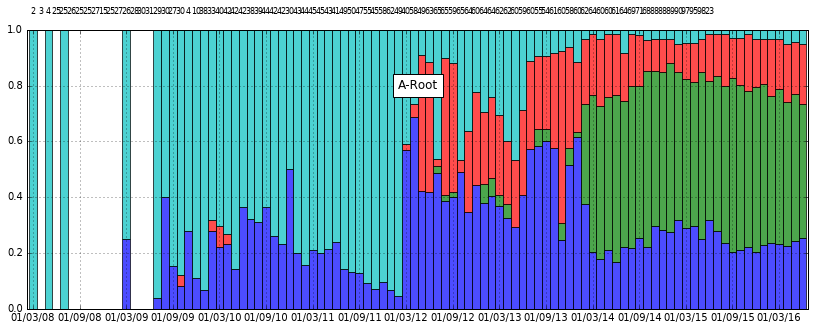

In [46]:
def format_date(dt):
    try:
        dt = dt.split(' ')[0]
        year, month, day = dt.split('-')
        returned = day + '/' + month + '/' + year[2:]
    except ValueError:
        returned = dt
        print('error: {}'.format(dt))
    return returned

fig, axes = plt.subplots()

for item in df.iterrows():
    total = item[1]['identical'] + item[1]['different_path'] + item[1]['ipv4_shorter'] + item[1]['ipv6_shorter']
    item[1]['identical'] = item[1]['identical'] / total
    item[1]['different_path'] = item[1]['different_path'] / total
    item[1]['ipv4_shorter'] = item[1]['ipv4_shorter'] / total
    item[1]['ipv6_shorter'] = item[1]['ipv6_shorter'] / total

bars = df.plot.bar(stacked=True, 
                             ax=axes, 
                             figsize=(14,5), 
                             width=1.0,
                             alpha=0.7,
#                              xlim=(pd.Timestamp('2008-03-1'), pd.Timestamp('2016-06-01')),
                             ylim=(0,1))

temp_set = set()
for bar in bars.patches:
    temp_set.add(bar.get_x())
temp_list = sorted(list(temp_set)) 
    
for idx, item in enumerate(res):
    total = item['identical'] + item['ipv4_shorter'] + item['ipv6_shorter'] + item['different_path']
    axes.text(temp_list[idx] + 0.5, 
                         1.065, 
                         int(total), 
                         horizontalalignment='center', 
                         verticalalignment='center',
                         fontsize=8)

n = 6

axes.text(0.5, 0.8, '{}-Root'.format(root.upper()), horizontalalignment='center', verticalalignment='center', transform= axes.transAxes, fontsize=12, bbox={'facecolor':'white', 'pad':5})
axes.grid(True)

ticks = axes.xaxis.get_ticklocs()
ticklabels = [format_date(l.get_text()) for l in axes.xaxis.get_ticklabels()]
axes.xaxis.set_ticks(ticks[::n])
axes.xaxis.set_ticklabels(ticklabels[::n], rotation=0)
axes.set_xlabel('')
axes.legend().set_visible(False)

plt.show()

## TEMPORARY!!!